# Intra-species (Sebastes pinniger) Trophic Position Variability

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER,LATITUDE_FORMATTER
from maptools import make_map
import cartopy.io.img_tiles as cimgt
from scipy import linalg
import scipy.stats as stats
import seaborn as sns
from PCA import pca

Above are all the packages one will need to have installed in their computer in order to run this program, as well as access to maptools and pca packages which are included in the repository for this project. 

## INTRODUCTION

There have been many trophic ecology studies completed regarding single species in order to identify intra-species variability. Observed differences can be attributed to a plethora of reasons, including individual biological fish characteristics that contribute to variation in energy resources and allocation. For example, larger, heavier, sexually mature, and female organisms tend to have higher trophic positions as they require more resources or more energetically dense resources in order to sustain their metabolisms. On the other hand, there are studies that find differences in diets within species due to geographic or oceanographic conditions. For example, based on geographic locations, food webs can be drastically different in size, complexity, and biodiversity, thus portraying differences of trophic preferences. In addition different habitat types, depths, currents, or oceanographic conditions like pH, temperature, or salinity can influence habitat selection and foraging patterns. Thus it is essential to look at both biological and environmental contributers to trophic ecology studies both together and separately in order to indicate what factors are contributing to trophic variablity the most. Intra-species trophic variability has large implications on the ecosystem services and roles for the species in their respective food webs. If this is shifting over spatial distributions, then ecosystem based fisheries management should adapt different spatial management regulations. If certain quantitative factors of an environment can be easily measured and used to predict or describe these highly variable ecological interactions, fisheries management practices could become more specialized and thus effective over broad spatial distances. 

This code was constructed in order to run 3 different PCAs for Canary Rockfish (Sebastes pinniger) data along the California Current System (CCS) as a part of preliminary data analysis for my thesis. My thesis partially concerns the trophic ecology of the Canary Rockfish along the CCS. Therefore, the PCAs ran within this code have been broken into 3 different categories in order to understand how trophic position based on stable isotopes δ15N and δ13C, are varying based on a multitude of biological and environmental factors. I have indicated that total length, weight, Fulton's K, GSI, and HSI (explained in further depth within the readme.md file) to be biological indicators of individual fish characteristics, and latitude, longitude, depth, relief, and managment zone latitude to be environmental indicators. I chose to run these groupings separately and together in order to see which of the factors is contributing to the most variance in trophic position based on different scales. Adter the PCAs are run, I also preform some data exploration through the creation of box plots, bar plots, and scatter plots for previously proven significant variables of trophic ecology. This includes both trophic position (C:N) and d15N compared either across management regions or based on different categorical and quantitative data. 

## __METHODS AND DATA SOURCES:__

Data Source: This data is sourced from my thesis. However, the origin of this dataset is attributed to Rachel Brooks' sampling for her thesis concerning life history parameters of the Canary Rockfish along the CCS. 

Methods: In order to capture my sampling area and thus the area of significant results I constructed a map with all 13 sampling ports, as well as the 5 different fishery management regions along the US West Coast. 

Following the map figure I have conducted 3 different PCA analyses via the creation of covariance and factor loading matrices based on the 3 different variable inputs. Then I plotted all of the factor loadings for each variable upon the newly formed PC1s and PC2s for each data subset in order to show how the variance of each variable is described by each PC1 and PC2. 

I chose to run a PCA as I am testing the effects of several different parameters. The PCA will help to organize all of these parameters into 2 axes which will visually display what factors are contributing most to the variance observed in trophic positon and stable isotope values. This will help give me a better idea which factors to focus in on when performing data analysis for my thesis and identify the possible parameters I will need to further investigate to draw significant conclusions on what factors drive canary rockfish diets along the CCS. In order to run a PCA, I will have to clean and standardize the 3 datasets based on biological, environmental, and combined datasets. Then I will compute a correlation/covariance matrix. These matrices will be used to compute my eigenvalues and eigenvectors using linear algebra. The eigenvalues represent the total variance explained by the single principal component of the dataset and give me a better idea of how to sort the eigenvalues so the largest numbers coorespond with PC1 and PC2. I will then compute factor loading values in order to visually display how much each PC represents the variance within each variable measured. The factor loading graphs shown represent each of the subsets of data with individual samples on the x axis and the principal components on the y axis. This is to help illustrate how each of the individual samples is represented by the individual PC values.

Following the PCA test, I have included a plethora of graphs that represent my possible hypotheses of important variables and drivers of trophic differences. These are variables I have found within other literature studies to typically be significant, but they can always be editted for different projects to explore other possible data relationships. 

#### Map of Sampling Locations

In [2]:
ccs = [-116,-128,52,30] #california current system coordinates 
longitude = [-114,-130] #longitude coordinates
#mgmt region coordinates 
latitudem = [36,36]
latitudee = [40.1,40.1]
latitudec = [43,43]
latitudev = [47.3,47.3]

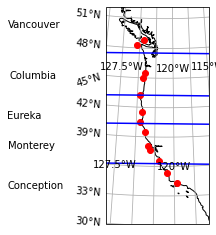

In [3]:
plt.figure()
ax = make_map(projection=ccrs.LambertConformal(central_longitude=-121, central_latitude = 40))
ax.set_extent(ccs)
plt.plot(-120.93,35.29,'ro',transform=ccrs.PlateCarree()) #morro bay
plt.plot(-125.37,48.25,'ro',transform=ccrs.PlateCarree()) #neah bay 
plt.plot(-124.35,48.87,'ro',transform=ccrs.PlateCarree()) #westport
plt.plot(-124.02, 45.50,'ro',transform=ccrs.PlateCarree()) #garibaldi
plt.plot(-124.62, 43.23,'ro',transform=ccrs.PlateCarree()) #coos bay
plt.plot(-124.23,41.51,'ro',transform=ccrs.PlateCarree()) #brookings
plt.plot(-123.84, 39.52,'ro',transform=ccrs.PlateCarree()) #fort bragg
plt.plot(-123.08,37.69,'ro',transform=ccrs.PlateCarree()) #half moon bay
plt.plot(-121.96, 36.54,'ro',transform=ccrs.PlateCarree()) #moss
plt.plot(-123.40,38.06,'ro',transform=ccrs.PlateCarree()) #bodega bay
plt.plot(-124.35,44.97,'ro',transform=ccrs.PlateCarree()) #newport
plt.plot(-119.73,34.36,'ro',transform=ccrs.PlateCarree()) #conception
plt.plot(-124.45,40.49,'ro',transform=ccrs.PlateCarree()) #eureka
plt.text(-140,32,'Conception', transform=ccrs.PlateCarree())
plt.plot(longitude,latitudem, '-',color='blue', transform=ccrs.PlateCarree())#montereymgmt
plt.text(-141,36,'Monterey', transform=ccrs.PlateCarree())
plt.plot(longitude,latitudee, '-',color='blue', transform=ccrs.PlateCarree()) #eurekamgmt
plt.text(-142,39,'Eureka', transform=ccrs.PlateCarree())
plt.plot(longitude,latitudec, '-',color='blue', transform=ccrs.PlateCarree()) #columbiamgmt
plt.text(-143,43,'Columbia', transform=ccrs.PlateCarree())
plt.plot(longitude,latitudev, '-',color='blue', transform=ccrs.PlateCarree()) #vancouvermgmt
plt.text(-145,48,'Vancouver', transform=ccrs.PlateCarree())
ax.coastlines()

## __RESULTS:__

#### PCA

In [4]:
#subsetting the different data sets: biological characteristics, environmental characteristics and both
data = pd.read_csv('pythonproject.csv')
dataframe = data[['TL cm', "Fulton's K", 'GSI (g)', 'HSI (g)', 'Weight', 'mgmt_lat', 'Depth m', 'Lat', 'Long', 'Relief' ]]
bio = data[['TL cm', "Fulton's K", 'GSI (g)', 'HSI (g)', 'Weight']]
env = data[['mgmt_lat', 'Depth m', 'Lat', 'Long', 'Relief']]
iso = data[['Magement Region','d15N','d13C','%N','%C','C:N']]

#### Correlation/Covariance Matrix

In [5]:
#see PCA.py files for details to the steps preformed here 
value1, vec1, data_norm = pca(dataframe)
value2, vec2, bio_norm = pca(bio)
value3, vec3, env_norm = pca(env)
#resorting from greatest to least since the variances were out of order
value1f = value1[[0,1,5,8,9,7,6,4,3,2]]
value2f = value2[[0,3,4,2,1]] 
value3f = value3[[0,4,3,2,1]]

In [6]:
#how much each PC accounts for total variance 
print(value1f/np.sum(value1f))
print(value2f/np.sum(value2f))
print(value3f/np.sum(value3f))

[[0.30800799 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.20255856 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.11872269
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.10043499 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.08962582]
 [0.         0.         0.         0.         0.         0.
  0.         0.07303655 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.05540843 0.         0.         0.        ]
 [0.         0.         0.         0.         0.03093536 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.01776248 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.003

#### Factor Loading Matrix

In [7]:
A = np.matmul(vec1,value1f**.5)
B = np.matmul(vec2,value2f**.5)
C = np.matmul(vec3,value3f**.5)

#### Figures

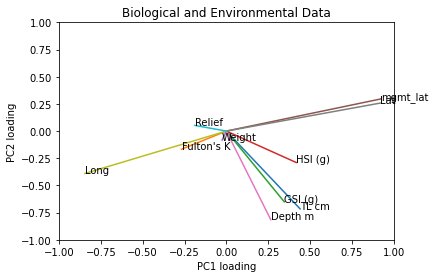

In [8]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')
plt.title('Biological and Environmental Data')

variables = ['TL cm', "Fulton's K", 'GSI (g)', 'HSI (g)', 'Weight', 'mgmt_lat', 'Depth m', 'Lat', 'Long', 'Relief']
for i,txt in enumerate(variables):
    plt.plot([0,A[i,0]],[0,A[i,1]],'-') #plotted PC1 and PC2 
    plt.text(A[i,0],A[i,1],txt)

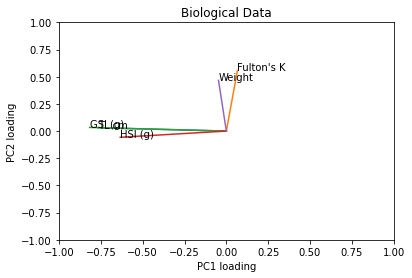

In [9]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')
plt.title('Biological Data')

variables = ['TL cm', "Fulton's K", 'GSI (g)', 'HSI (g)', 'Weight']
for i,txt in enumerate(variables):
    plt.plot([0,B[i,0]],[0,B[i,1]],'-') #plotted PC1 and PC2 
    plt.text(B[i,0],B[i,1],txt)

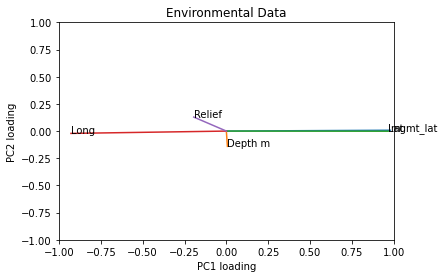

In [10]:
plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])

plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')
plt.title('Environmental Data')

variables = ['mgmt_lat', 'Depth m', 'Lat', 'Long', 'Relief']
for i,txt in enumerate(variables):
    plt.plot([0,C[i,0]],[0,C[i,1]],'-') #plots PC1 and PC2 on x and y axis with factor loadings of each variable 
    plt.text(C[i,0],C[i,1],txt)

If variables are clumped together, it means that they covary (similar direction with respect to origin), with similar magnitudes (similar distance from origin).

### Principal Component Score

In [11]:
tau1 = np.matmul(data_norm,vec1)
tau2 = np.matmul(bio_norm,vec2)
tau3 = np.matmul(env_norm,vec3)

Text(0.5, 0, 'Individual Samples')

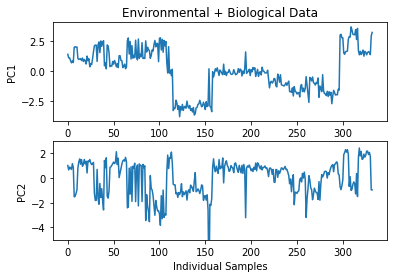

In [12]:
plt.figure()
plt.subplot(211)
plt.title('Environmental + Biological Data')
plt.ylabel('PC1')
plt.plot(tau1[:,0])
plt.subplot(212)
plt.plot(tau1[:,1])
plt.ylim(-5,3)
plt.ylabel('PC2')
plt.xlabel('Individual Samples')

Text(0.5, 0, 'Individual Samples')

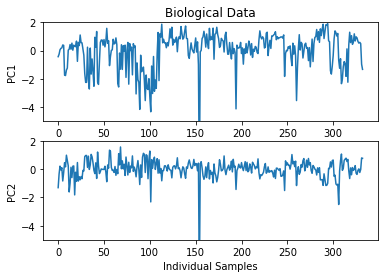

In [13]:
plt.figure()
plt.subplot(211)
plt.title('Biological Data')
plt.plot(tau2[:,0])
plt.ylim(-5,2)
plt.ylabel('PC1')
plt.subplot(212)
plt.plot(tau2[:,1])
plt.ylim(-5,2)
plt.ylabel('PC2')
plt.xlabel('Individual Samples')

These show individual samples on the x axis and how they are represetned (variance) by PC1 (top graph) and PC2 (bottom graph)

Text(0.5, 0, 'Individual Samples')

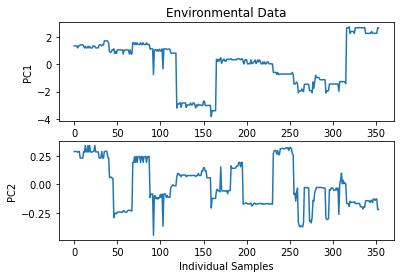

In [14]:
plt.figure()
plt.subplot(211)
plt.title('Environmental Data')
plt.plot(tau3[:,0])
plt.ylabel('PC1')
plt.subplot(212)
plt.plot(tau3[:,1])
plt.ylabel('PC2')
plt.xlabel('Individual Samples')

### Representation of Isotope Variables Within Management Regions

Text(0, 0.5, 'd15N')

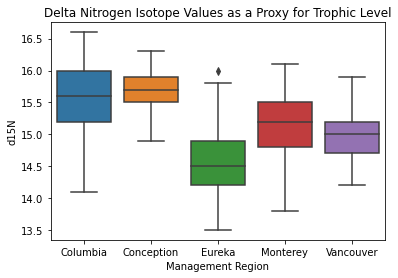

In [15]:
#boxplot for management region and delta N15
ax1 = sns.boxplot(x='Magement Region', y='d15N', data=iso)
ax1.axes.set_title('Delta Nitrogen Isotope Values as a Proxy for Trophic Level')
ax1.set_xlabel('Management Region')
ax1.set_ylabel('d15N')

Text(0, 0.5, 'C:N')

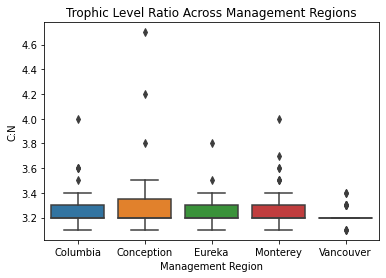

In [16]:
#box plot displaying the differences in baseline trophic position throghout the regions
ax2 = sns.boxplot(x='Magement Region', y='C:N', data=iso)
ax2.axes.set_title('Trophic Level Ratio Across Management Regions')
ax2.set_xlabel('Management Region')
ax2.set_ylabel('C:N')

Text(0, 0.5, 'd13C')

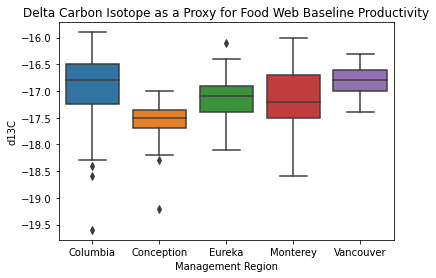

In [17]:
#box plot displaying the differences in baseline carbon isotope values throghout the regions
ax3 = sns.boxplot(x='Magement Region', y='d13C', data=iso)
ax3.axes.set_title('Delta Carbon Isotope as a Proxy for Food Web Baseline Productivity')
ax3.set_xlabel('Management Region')
ax3.set_ylabel('d13C')

### Representation of Key Variables as Functions of Isotopic Values

Text(0.5, 1.0, 'Individual Fish Weight Compared to Trophic Position')

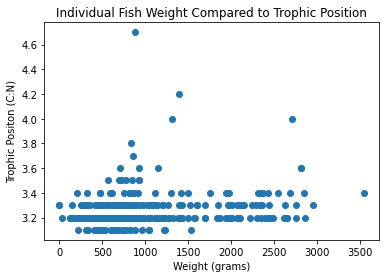

In [18]:
#scatter plot displaying relationship between weight and trophic position 
plt.figure()
plt.plot(data['Weight g'], data['C:N'],'o')
plt.xlabel('Weight (grams)')
plt.ylabel('Trophic Positon (C:N)')
plt.title('Individual Fish Weight Compared to Trophic Position')

Text(0.5, 1.0, 'Individual Fish Length Compared to Trophic Position')

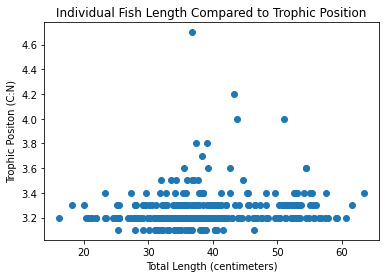

In [19]:
#scatter plto displaying length and trophic position 
plt.figure()
plt.plot(data['TL cm'], data['C:N'],'o')
plt.xlabel('Total Length (centimeters)')
plt.ylabel('Trophic Positon (C:N)')
plt.title('Individual Fish Length Compared to Trophic Position')

Slope is = 0.02558934349722097
R^2 = 0.3579756682254301


Text(0.5, 1.0, 'Individual Fish Length Compared to d15N')

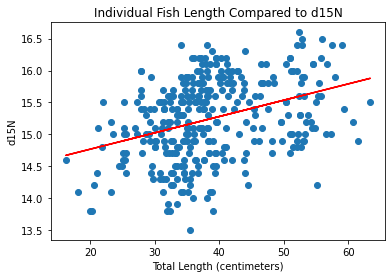

In [20]:
#includes linear regression slope and r^2 values for fish length versus d15N
tl = data['TL cm']
d15 = data['d15N']
ii = np.isfinite(tl+d15)
p = np.polyfit(tl[ii], d15[ii], 1)
print('Slope is =', p[0])
regress = stats.linregress(tl[ii],d15[ii])
print('R^2 =', regress[2])

plt.figure()
plt.plot(tl, d15,'o')
plt.plot(tl,p[0]*tl+p[1],'r-')
plt.xlabel('Total Length (centimeters)')
plt.ylabel('d15N')
plt.title('Individual Fish Length Compared to d15N')

Slope is = 0.000294769427902422
R^2 = 0.3218382505351985


Text(0.5, 1.0, 'Individual Fish Weight Compared to d15N')

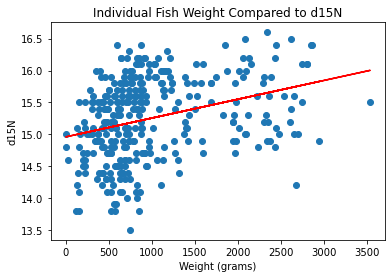

In [21]:
#includes linear regression slope and r^2 values for fish weight versus d15N
weight = data['Weight g']
ii2 = np.isfinite(weight+d15)
p2 = np.polyfit(weight[ii2], d15[ii2], 1)
print('Slope is =', p2[0])
regress2 = stats.linregress(weight[ii2],d15[ii2])
print('R^2 =', regress2[2])

plt.figure()
plt.plot(weight, d15,'o')
plt.plot(weight,p2[0]*weight+p2[1],'r-')
plt.xlabel('Weight (grams)')
plt.ylabel('d15N')
plt.title('Individual Fish Weight Compared to d15N')

Text(0.5, 1.0, 'Weight and Length With Respect to Trophic Position')

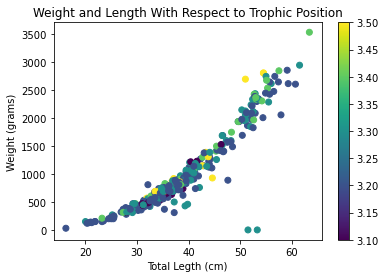

In [22]:
#scatter plot displaying the exponential relationship of length versus weight and color coded by trophic position
plt.figure
plt.scatter(data['TL cm'], data['Weight g'], c=data['C:N'])
plt.colorbar()
plt.clim(3.1,3.5) #narrowing limits to see more discrepancies 
plt.xlabel('Total Legth (cm)')
plt.ylabel('Weight (grams)')
plt.title('Weight and Length With Respect to Trophic Position')

Text(0.5, 1.0, 'Weight and Length With Respect to d15N')

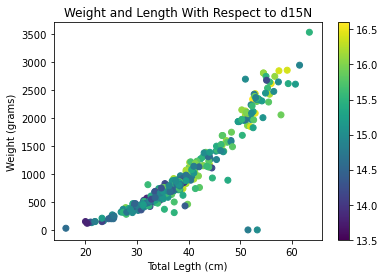

In [23]:
#scatter plot displaying the exponential relationship of length versus weight and color coded by d15N
plt.figure
plt.scatter(data['TL cm'], data['Weight g'], c=data['d15N'])
plt.colorbar()
plt.xlabel('Total Legth (cm)')
plt.ylabel('Weight (grams)')
plt.title('Weight and Length With Respect to d15N')

Text(0, 0.5, 'C:N')

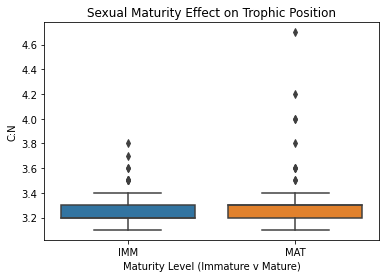

In [24]:
#comparison of sexual maturity's affects on trophic position
ax4 = sns.boxplot(x='Maturity', y='C:N', data=data)
ax4.axes.set_title('Sexual Maturity Effect on Trophic Position')
ax4.set_xlabel('Maturity Level (Immature v Mature)')
ax4.set_ylabel('C:N')

Text(0, 0.5, 'd15N')

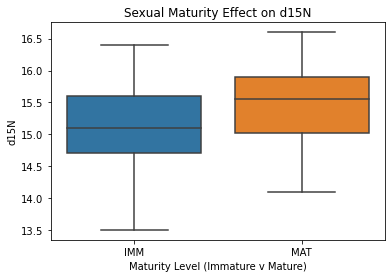

In [25]:
#comparison of sexual maturity's affects on d15N
ax6 = sns.boxplot(x='Maturity', y='d15N', data=data)
ax6.axes.set_title('Sexual Maturity Effect on d15N')
ax6.set_xlabel('Maturity Level (Immature v Mature)')
ax6.set_ylabel('d15N')

Text(0, 0.5, 'C:N')

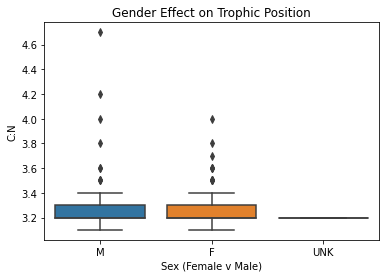

In [26]:
#comparison of gender's affect on trophic position
ax5 = sns.boxplot(x='Sex', y='C:N', data=data)
ax5.axes.set_title('Gender Effect on Trophic Position')
ax5.set_xlabel('Sex (Female v Male)')
ax5.set_ylabel('C:N')

Text(0, 0.5, 'd15N')

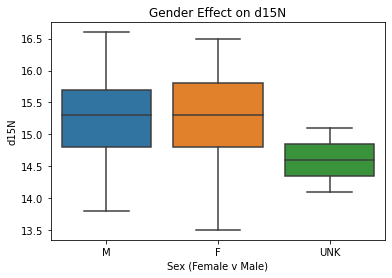

In [27]:
#comparison of gender's affect on d15N
ax7 = sns.boxplot(x='Sex', y='d15N', data=data)
ax7.axes.set_title('Gender Effect on d15N')
ax7.set_xlabel('Sex (Female v Male)')
ax7.set_ylabel('d15N')

<AxesSubplot:xlabel='Magement Region', ylabel='d15N'>

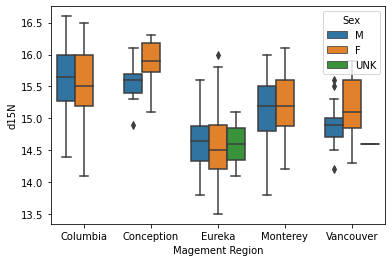

In [28]:
sns.boxplot(x='Magement Region', y='d15N', data=data, hue='Sex')

<AxesSubplot:xlabel='Magement Region', ylabel='d15N'>

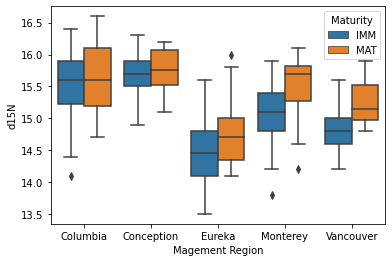

In [29]:
sns.boxplot(x='Magement Region', y='d15N', data=data, hue='Maturity')

## CONCLUSIONS:

From an environmental point of view a large amount of PC1 and thus the overall variance can be attributed to latitude and longitude measurements, thus where these fish are located with the geography of the CCS. This is evident in both the subset of the environmental factors as well as all the data combined, indicating geographic location to be an important indicator for the trophic position of the Canary Rockfish along the CCS. Depth and relief contribute to most of the PC2 variance, but in much smaller contribution than latitude and longitude. PC1 encaptures 55% of the total variability and PC2 displays 24% thus totalling 79% of the total variance. 

The latitude given by specific fish captures and the latitude given for each management region appear to vary with the same magnitude and direction, thus it makes it more statistically sound to pick just one of these measurements going forward with future analyses. I will likely use individual latitude values as this encaptures more detailed variability per data point than management latitude values. As well as this parameter coorresponds better to the individual longitude values. 

From a biological point of view, PC1 encaptures the variance of GSI, HSI, and total length and PC2 for weight and Fulton's K. This is a little different from what I expected, as length is used in calculating Fulton's K and GSI whereas weight is used to calculate HSI and Fulton's K, yet some of these variables appear on different axes. PC1 encaptures 33% and PC2 displays 20% of the total variance of the dataset thus a total of 53% of the variance is enacaptured by these two variables which is fairly low.

When looking at the variances across all factors there seems to be extensive variability amongst both PC1 and PC2. Longitude, Fulton's K, latitude, and relief display a majority of the variance within PC1 and weight, HSI, GSI, total length, and depth are encaptured by PC2. The most important overall factors seems to be latitude and longitude for PC1 and depth and total length for PC2. PC1 encaptures 30% and PC2 20% of the total variance for the dataset which is fairly low. 

The time-series looking plots plots PC1 and PC2 with individual samples and displays some interesting anamolies. For example. the second plot representative of biological data shows fairly small variation amongst samples with PC1 and 2 indicating that the parameters measured are likely to be somewhat similar and interrelated. In comparison to the environmental and combined data sets show a lot more variables amongst samples. This leads me to believe that environmental factors may be more of a contributing factor to variability more than biological parameters. However, it is important to note that there is a large outlier around n=150 that is dramatically elongating the axes. This could be a significant contributer to why the variance doesnt seem to oscillate dramatically. Therefore, I went ahead and re-editted my graphs to disclude this outlier by shortening the display axes, and give a better representation of the data's variability. Upon performing theses axes tranformations, I still see more variability within environmental as compared to biological data, which gives me a direction in order for further research to be applied. 

When looking at the box plots for different isotope variables and how it varies across Management Regions we don't see much variability when it comes to overall trophic position or delta 13C values. However we see more variability within the delta 15N values. This tells us that the primary productivity/baseline producers (13C) of the food webs do not vary greatly amongst management regions, but moreso where the organisms are eating (15N) is causing the small varibility we may see in overall trophic position. Eureka seems to be the most different region compared to the others in 15N which is fairly interesting as this management region is in the middle of all of the other regions. I thought there may be a strong latitudinal gradient present for either trophic position, 13C, or 15N values but we do not see this at all. We actually see random oscialltion and variability for 15N, which is not based in latitude, therefore there is some other variable causing this change and should be a focus for further research. 

I tried to visualize trophic position by both length and weight. However the scatter plots display similar results as to what we saw in the box plots representations which is a lot of variability for both length and weight values as they pertain to overall trophic position based on C:N. However when length and weight are plotted against d15N we see trends that we would expect to see: positive relationships between length and 15N as well as weight and 15N. This is attributed to as fish get larger in body size their metabolisms demand more from their trophic ecology and thus we see higher 15N values. It is still important to note that the r^2 values are .37 and .32 for length an weight's relationships to trophic position which are still realtively low and are attributed to the large variability for single values of length or weight. This can also be seen by the plot that displays the length and weight of fish plotted in a scatterplot and color coded by trophic position and then later by d15N. We see a clear exponential relationship between length and weight but we also see a relationship to trophic position, but perhaps a stronger gradient with d15N. With higher d15N and trophic position values represented by higher length and weight ratios. 

Finally I wanted to represent my important categorical variables in some capacity as I felt as though they may reveal some interesting information. This is why I created the box plots for both maturity levels and gender, but we see a similar trend to the other graphs with both respect to trophic position and d15N. The plots display a slight increase in d15N with sexual mature fish as opposed to immature. On the other hand, gender doesn't seem to have an impact at all. This is surprising as most trophic ecology studies show that females require higher trophic levels as they need more resources to sustain the reproductive cycle. However, in my final plots I actually plotted each sex and maturity level as a function of both management region and delta 15N. Here we actually see some discrepancies and significant differences between all of these factors. However the differences still seem to be fairly random in nature, or at least not based in latitudinal gradients, thus there are other important factors I should investigate going forward. This is quite interesting as latitude and longitude appeared to be the most signfiicant contributers to variability upon running the PCA tests. This led me to believe there would be a clear latitudinal gradient, which is not the case. This random fluctuation across regions must be attributed to something different oceanographically, and my focus going forward will be to investigate what this might be. My possible hypotheses are currents, upwelling regimes, productivity, and structure/biodiversity of food webs within each region. 
My future research will also look further into each of theses properties I examined within this resport and their combined affect with other factors both enviornmental and biological. 

## AREAS FOR FUTURE STUDY:

I believe one of the limitations of this study is due to the fact that some of my variables describing seasonality, gender, and maturity stage are qualitative and thus fairly difficult to incorporate into a numerical PCA. I suggest in the future, either finding a way to include these variables into the PCA, or conducting different tests to incorporate both quantitative and qualitative factors together for direct comparison. Here I have illustrated possible affects that categorical variables may be having on isotopic values, however did not directly compare their relationship to other quantitative variables.   

Obviously, this study has 350 samples which although is a lot, there could always be more espeically considering the large spatial range this study covers. In addition, some of the sampling regions possess a large number of samples in comparison to other regions, so these regions may be weighted more heavily in the overall interpretation of the PCA. Another possible data hole is baseline isootpic data throughout the geographic range. Acquiring isotopic data for common prey items at the bottom of the food webs in each respective management region would allow me to standardize the changes in carbon isotopic values and preform a more controlled/standardized comparison of variables affects on isotopic values. 

My next step in terms of my thesis is performing stomach dissections in order to understand the prey items consumed. Upon completion, my next data analysis step will be to see if these same factors are influencing the actual prey items being eaten based both on abundance, weight, and overall importance in diet (instead of trophic position alone). However, I will not be able to run a PCA in this next case as these will be mostly qualitative variables that would be extremely difficult to quantify and run through a PCA. Therefore I will need to preform a different statistical test. Finally, I will also analyze each fish for mercury concentrations within their dorsal tissue. I will use this data to compare to both the isotopic data as well as stomach contents, likely using a PCA and another test based on quantitiative or qualitative variables. This will provide insight into how possible mercury bioaccumulates throughout similar but slightly different food webs based on trophic preferences and predator prey interactions.

## REFERENCES:

This data is my own as well as can be attributed to Rachel Brooks' Master thesis for Moss Landing Marine Laboratories Ichthyology Lab (funded project by California Sea Grant). 